In [ ]:
# ==42==

In [ ]:
# 머신러닝의 본질은 모아진 데이터로부터 컴퓨터가 스스로 해법을 찾는것.
# Dezero를 사용하여 데이터를 사용하여 문제를 해결하는 시도를 한다.

In [ ]:
# 토이데이터셋) 실험용으로 만든 작은 데이터셋
# 예측 모델) x,y라는 두개의 변수로 구성된 데이터셋을 생성/ x와 y는 선형관계 / y에 추가된 노이즈로 구름처럼 퍼짐
# x값이 주어지면 y값을 예측하는 모델을 만든다

In [1]:
import numpy as np

np.random.seed(0)
x = np.random.rand(100,1)
y = 5+2*x+np.random.rand(100,1)

데이터의 예측치를 구하는 predict함수를 구현) 매개변수 W와 b를 Variable인스턴스로 생성

경사하강법으로 매개변수를 갱신

매개변수를 갱신할때는 W.data -=lr*W.grad.data처럼 인스턴스 변수의 data에 대한 계산
매개변수 갱신은 단순히 데이터를 갱신
코드를 실행하면, 손실함수의 출력값이 줄어든다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

#Generate toy dataset
np.random.seed(0)
x = np.random.rand(100,1)
y = 5+2*x+np.random.rand(100,1)
x,y =  Variable(x), Variable(y) #2차원에 데이터가 만들어진다. > 우리가 만들것은 회귀모델
#머신이 알아서 데이터를 보고 가장 합당한 모델을 만들것.

W = Variable(np.zeros((1,1)))
b =  Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x,W) + b #행렬의 곱 계산
    return y

def mean_squared_error(x0,x1): #예측한값과 정답값. 손실함수
    diff = x0-x1
    return F.sum(diff ** 2) / len(diff)

 # 경사하강법을 통해 학습을 시킨다.
lr = 0.1 #학습률을 0.1로 한다.
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    #Update .data attribute
    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)

    #선형데이터를 보고 학습을 했구나! 가장 합당하고 최적화된 W와 b를 찾는다.

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.554280381353593)
variable([[2.21482401]]) variable([4.52705574]) variable(1.492599869047195)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756939)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227455)
variable([[2.39573972]]) variable([4.9467725]) variable(0.3585915308319281)
variable([[2.425382]]) variable([5.02561369]) variable(0.24915731977561134)
variable([[2.44575118]]) variable([5.08588371]) variable(0.1869065876539789)
variable([[2.45917205]]) variable([5.13217364]) variable(0.1513533629631488)
variable(

**point!**
mean_squared_error의 문제점
임시로 데이터를 저장해두는데도 메모리를 차지하고있어서 차지하지않게 하기위해 해당 이름없는변수들을 없앤다.

In [ ]:
==43==

선형회귀를 신경망으로 확장
비선형 데이터를 어떻게 신경망으로 문제를 해결하는지 보자

Affine아핀
풀리커넥티드 구조되어있다.
x와 W사이에 행렬 곱을 구하고 b를 더한다.
선형 변환은 하나도 빠짐 없이 완전연결계층에 해당된다.

선형변환을 linear함수로 구현한다.

*비선형 데이터를 만들어보자
비선형 데이터셋) 선형 회귀로는 문제를 풀 수 없지만 신경망을 이용하여 문제를 해결할 수 있다.

*활성화 함수
선형변환은 입력데이터를 선형으로 변형해주고 비선형 변환이 활성화 함수.

*시그모이드 함수
신경망을 구현하는 함수
비선형 변환이 텐서의 각 원소에 적용된다.

*신경망 추론
> 연속적으로 변환을 수행한느 일반적인 신경망 형태
(선형변환 -> 활성화 함수 -> 선형변환 -> 활성화 함수 -> ...)
정확성을 위해 학습
추론을 처리한 후 손실 함수를 추가한다.

*linear함수
변수 t는 matmul함수의 추력인 동시에 +(add)함수의 입력이다.
+의 역전판느 출력 쪽의 기울기를 단순히 흘려보낸다.

linear->활성함수->linear->활성함수

비선형 데이터 셋을 생성.
쓰이는 함수는 시그모이드 함수..
활성화 함수를 통해서 비선형으로 바꿔준다.

순전파일때 input과 output을 다 맞춰준다.

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.24759485466749873)
variable(0.23786120447054812)
variable(0.21222231333102912)
variable(0.16742181117834157)
variable(0.09681932619992668)
variable(0.07849528290602334)
variable(0.07749729552991157)
variable(0.07722132399559319)


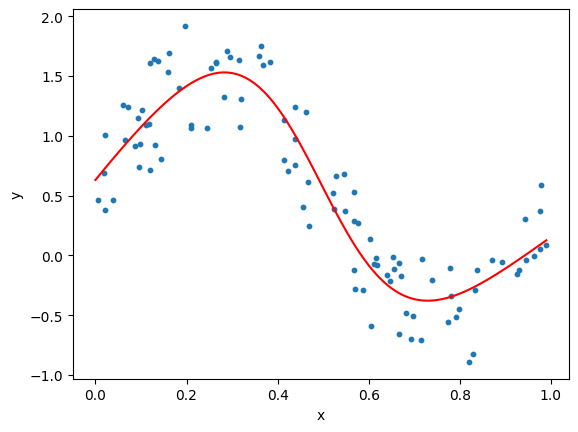

In [4]:
#데이터 셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

#가중치 초기화
#편의성을 위해 매개변수를 초기화한다.
#I는 입력층의 차원수, H는 은닉층의 차원수
#O는 출력층의 차원수, 편향은 0벡터로 초기화
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H)) #인풋I, 아웃풋H
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O)) #인풋H, 아웃풋O를 일치시켜준다. (차원 수 를 맞춰준다.)
b2 = Variable(np.zeros(O))

#신경망 추론
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y


lr = 0.2
iters = 10000

#신경망 학습&매개변수 갱
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    #경사하강법으로 다 업데이트를 시킨다.
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

==44==

In [ ]:
Dezero 신경망 프레임워크의 사용 편의성 개선
신경망에서 자동미분을 만들고 비선형데이터로 문제를 해결
> 더 간단하고 직관적으로 구현할 수 있도록 편의성을 개선
> 층이 깊어질수록 매개변수 관리가 번거로워진다.
> 매개변수 관리를 간소화할 구조가 필요하다.
>> Parameter와 Layer라는 클래스를 구현.

*Parameter인스턴스와 Variable인스턴스 구별
isinstance 함수로 구분한다.

*Layer클래스 구현
Function클래스와 똑같이 변수를 변환하는 클래스
매개변수를 유지한다는것이 다르다.

_params라는 인스턴스 변수는 Layer 인스턴스에 속한 매개변수를 보관한다.
1. value가 Parameter 인스턴스라면 self._params에 name을 추가한다.
2. name을 추가해 Layer클래스가 갖는 매개변수를 인스턴스 변수 _params에 모아둔다.

__setattr__메서드는 인스턴스 변수를 설정할 때 호출된다.

override하면 인스턴스 변수를 설정할 때 커스텀 로직을 추가할 수 있다.

*Layer클래스의 4개의 메소드 추가
특히 cleargrads는 모든 매개변수의 기울기를 재설정한다.

*선형 변환을 하는 Linear클래스 구현
계층으로서의 Linear클래스를 구현
Linear클래스 Layer클래스를 상속하여 구현
w데이터는 Parameter의 데이터
forward에서는 linear에서 구현하지않은것을 구현. > F.linear함수를 호출.

클래스를 객체화해서 클래스를 호출 >  so simple



Linear 클래스 구현하는 더 나은 방법
-가중치W를 생성하는 시점을 늦춘다.
-가중치를 초기화 메서드가 아닌 forward메서드에서 생성하여 Linear클래스의 입력크기를 자동으로 결정

매개변수 관리를 Linear인스턴스가 맡고있다.
매개변수 기울기 재설정과 매개변수 갱신 작업이 전보다 깔끔해짐.

==45==

*현재 Layer클래스를 확장 필요성
>Layer 클래스는 매개변수를 관리하는 구조
>Layer인스턴스 자체도 관리가 필요.

*새로운 Layer클래스 구조
model =  Layer()에서 인스턴스 생성한 다음 model 인스턴스 변수로 Linear 인스턴스 추가
model.params()로 model내에 존재하는 모든 매개변수에 접근할 수 있다.

*더 편리하게 사용하는 방법
Layer 클래스를 상속하여 모델 전체를 하나의 클래스로 정의하는 방법.
TwoLayerNet이름으로 클래스 모델을 정의
이 클래스를 Layer를 상속
__init__메서드에서 필요한 Layer들을 생성하여 self.l1..형태로 설정

*모델을 표현하기 위한Model클래스 생성
Model클래스는 Layer클래스의 상속(Layer클래스처럼 활용할 수 있음)

*모델 클래스를 사용한 문제 해결
sin함수로 생성한 데이터셋 회귀 문제를 Model클래스를 이용하여 다시 풀어봄.
모든 매개변수는 model을 통해 접근할 수 있음.

*완전연결계층 신경망 구현
fc_output_sizes는 신경망을 구성하는 완전연결 계층들의 출력 크기를 튜플 또는 리스트로 지정.


In [8]:
import dezero.layers as L
from dezero import Model

#데이터셋 정리
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

#하이퍼파라미터 설정
lr = 0.2
max_iter = 10000
hidden_size = 10

# 모델 정의
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


model = TwoLayerNet(hidden_size, 1)

#학습 시
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355147)
variable(0.07655073683421636)
variable(0.07637803086238222)
variable(0.0761876413118557)
